In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read file 
orig_file = pd.read_csv("./Resources/fatal-police-shootings-data.csv")
clean_file = orig_file [["date", "armed", "age", "gender", "race", "state", 
                         "signs_of_mental_illness", "flee", "body_camera"]]
clean_file = clean_file.rename(columns={"date":"Date", 
                                        "armed":"Armed", 
                                        "age":"Age", 
                                        "gender":"Gender", 
                                        "race":"Race", 
                                        "state":"State",
                                        "signs_of_mental_illness": "Sign of Mental Illness", 
                                        "flee":"Flee", 
                                        "body_camera": "Body Camera"})

clean_file.head()

,Date,Armed,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,12/21/2017,unarmed,6.0,M,W,TX,False,Not fleeing,False
1,1/6/2015,unarmed,34.0,F,W,IA,False,Not fleeing,True
2,1/11/2016,unarmed,12.0,F,W,PA,False,Not fleeing,False
3,9/14/2016,toy weapon,13.0,M,B,OH,False,Foot,False
4,1/7/2015,gun,37.0,M,B,LA,False,Foot,True


In [5]:
clean_file.count()

Date                      4377
Armed                     4130
Age                       4191
Gender                    4372
Race                      3856
State                     4377
Sign of Mental Illness    4377
Flee                      4203
Body Camera               4377
dtype: int64

In [6]:
#clean for 2015-2018
clean_file['Date'] = pd.to_datetime(clean_file['Date'])  
# clean_file.head()
mask = (clean_file['Date'] > '2015-01-01') & (clean_file['Date'] <= '2018-12-31')
clean_date = clean_file.loc[mask]
clean_date.head()

,Date,Armed,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera
0,2017-12-21,unarmed,6.0,M,W,TX,False,Not fleeing,False
1,2015-01-06,unarmed,34.0,F,W,IA,False,Not fleeing,True
2,2016-01-11,unarmed,12.0,F,W,PA,False,Not fleeing,False
3,2016-09-14,toy weapon,13.0,M,B,OH,False,Foot,False
4,2015-01-07,gun,37.0,M,B,LA,False,Foot,True


In [7]:
clean_date.count()

Date                      3934
Armed                     3689
Age                       3801
Gender                    3931
Race                      3656
State                     3934
Sign of Mental Illness    3934
Flee                      3800
Body Camera               3934
dtype: int64

In [8]:
df = clean_date.dropna(how ="any")
df.count()

Date                      3272
Armed                     3272
Age                       3272
Gender                    3272
Race                      3272
State                     3272
Sign of Mental Illness    3272
Flee                      3272
Body Camera               3272
dtype: int64

In [9]:
df["Date"]

0      2017-12-21
1      2015-01-06
2      2016-01-11
3      2016-09-14
4      2015-01-07
5      2017-11-08
6      2015-01-08
7      2015-06-14
9      2015-10-15
10     2016-04-19
11     2015-01-08
12     2017-04-24
13     2015-01-13
14     2017-08-03
15     2017-09-15
16     2017-11-20
17     2018-08-18
18     2018-01-17
19     2016-03-13
21     2015-01-14
22     2015-02-14
23     2015-02-23
24     2015-03-19
25     2015-11-15
26     2015-01-17
27     2016-02-24
28     2016-03-20
29     2016-04-11
30     2015-02-11
31     2015-02-28
          ...    
3768   2018-11-05
3769   2017-03-28
3770   2018-05-06
3771   2016-12-12
3772   2015-02-07
3773   2017-05-23
3774   2015-01-14
3775   2017-06-07
3776   2015-04-26
3778   2015-09-01
3779   2018-11-27
3780   2016-11-01
3781   2017-09-10
3782   2018-10-10
3783   2015-02-20
3787   2017-04-24
3788   2016-06-13
3789   2018-04-05
3790   2018-11-29
3792   2015-04-12
3793   2016-12-01
3794   2018-02-12
3795   2018-10-12
3796   2018-03-07
3800   201

In [10]:
cut_points = pd.to_datetime([np.datetime64('2015-01-01'), np.datetime64('2015-12-31'), np.datetime64('2016-12-31'), np.datetime64('2017-12-31'), np.datetime64('2018-12-31')])



In [11]:
group_names = ["2015", "2016", "2017", "2018"]
bins = pd.cut(df['Date'], cut_points, labels=group_names)
# Create the names for the four bins
df["Year_bin"] =bins
df.head()



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date,Armed,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera,Year_bin
0,2017-12-21,unarmed,6.0,M,W,TX,False,Not fleeing,False,2017
1,2015-01-06,unarmed,34.0,F,W,IA,False,Not fleeing,True,2015
2,2016-01-11,unarmed,12.0,F,W,PA,False,Not fleeing,False,2016
3,2016-09-14,toy weapon,13.0,M,B,OH,False,Foot,False,2016
4,2015-01-07,gun,37.0,M,B,LA,False,Foot,True,2015


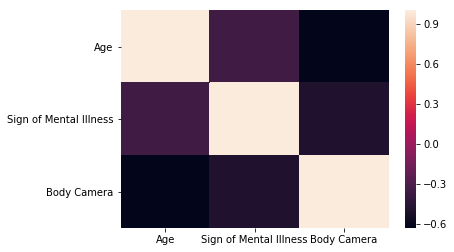

In [12]:
helper = df.assign(Age=df.Age.astype('category').cat.codes).corr()

helper = df.corr()
helper

#plt.matshow(helper.corr())
#plt.show()
corr = helper.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('corrmatrix.png')


In [13]:
year_group = df.groupby("Year_bin")
year_group["Age"].mean()
#year_group.count()

year_group.head()

,Date,Armed,Age,Gender,Race,State,Sign of Mental Illness,Flee,Body Camera,Year_bin
0,2017-12-21,unarmed,6.0,M,W,TX,False,Not fleeing,False,2017
1,2015-01-06,unarmed,34.0,F,W,IA,False,Not fleeing,True,2015
2,2016-01-11,unarmed,12.0,F,W,PA,False,Not fleeing,False,2016
3,2016-09-14,toy weapon,13.0,M,B,OH,False,Foot,False,2016
4,2015-01-07,gun,37.0,M,B,LA,False,Foot,True,2015
5,2017-11-08,knife,14.0,M,N,WI,False,Not fleeing,False,2017
6,2015-01-08,shovel,42.0,M,W,UT,False,Not fleeing,True,2015
7,2015-06-14,gun,15.0,M,W,FL,True,Not fleeing,False,2015
9,2015-10-15,gun,15.0,M,H,FL,False,Car,False,2015
10,2016-04-19,gun,15.0,M,B,MO,False,Other,False,2016


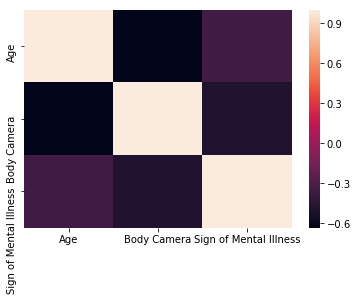

In [14]:
helper = year_group.corr()

helper
corr = helper.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


Text(0, 0.5, 'Body Cam Count')

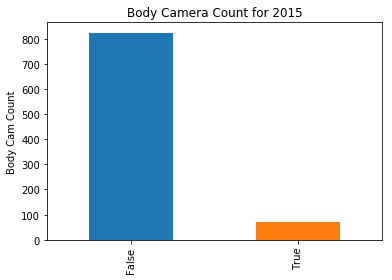

In [15]:
Body_cam2015 = df.loc[df['Year_bin'] == '2015']
Body_cam2015 = Body_cam2015.groupby("Body Camera").count()
Body_cam2015.head()

Body_cam2015['Year_bin'].plot.bar()

plt.title("Body Camera Count for 2015")
plt.xlabel("")
plt.ylabel("Body Cam Count")

#set_xticks(1)

#set_xticklabels('No Body Camera')
# %8.6

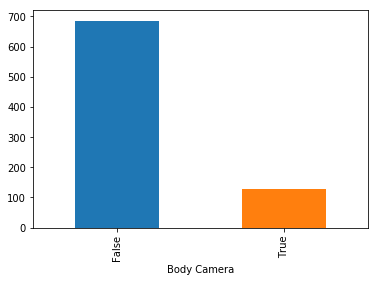

In [16]:
Body_cam2016 = df.loc[df['Year_bin'] == '2016']


Body_cam2016 = Body_cam2016.groupby("Body Camera").count()

Body_cam2016.head()
Body_cam2016['Year_bin'].plot.bar()
# %18.6

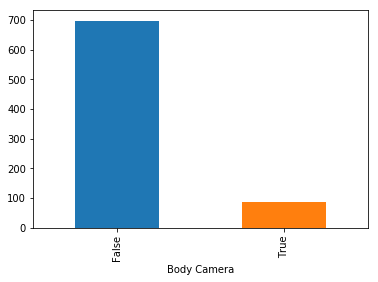

In [17]:
#compare body camera use by year 

#Body_Cam2015 = df.groupby(['Year_bin' = 2015,'Body Camera']).size().reset_index().groupby('Body Camera')[[0]].max()
#Body_Cam2015

#Body_Cam2016 = df.groupby(['Year_bin','Body Camera']).size().reset_index().groupby('Body Camera')[[0]].max()

Body_cam2017 = df.loc[df['Year_bin'] == '2017']

Body_cam2017 = Body_cam2017.groupby("Body Camera").count()
Body_cam2017
# %12.1
Body_cam2017['Year_bin'].plot.bar()


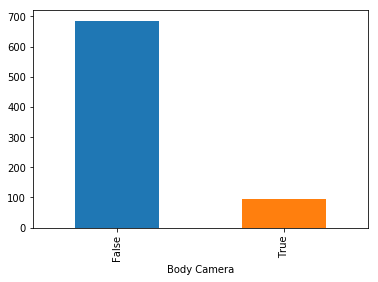

In [18]:
Body_cam2018 = df.loc[df['Year_bin'] == '2018']

Body_cam2018 = Body_cam2018.groupby("Body Camera").count()
#Body_cam2018
# %13.7
Body_cam2018['Year_bin'].plot.bar()
